# Car Price Prediction

In [24]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import os
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [25]:
# Importing dataset from GitHub repository
url = "https://raw.githubusercontent.com/Amith-Mohan/datasets/main/car_data.csv" # Raw version of the file on GitHub
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [26]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [27]:
# Dimensions of the dataset
df.shape

(301, 9)

In [28]:
# Checking datatype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [29]:
# Statistical information
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [30]:
# Check for null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Data Preprocessing

In [31]:
df['Age'] = 2023 - df['Year']
df.drop('Year',axis=1,inplace = True)

In [32]:
df.rename(columns = {'Selling_Price':'Selling_Price(lakhs)','Present_Price':'Present_Price(lakhs)','Owner':'Past_Owners'},inplace = True)

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [33]:
df.columns

Index(['Car_Name', 'Selling_Price(lakhs)', 'Present_Price(lakhs)',
       'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission',
       'Past_Owners', 'Age'],
      dtype='object')

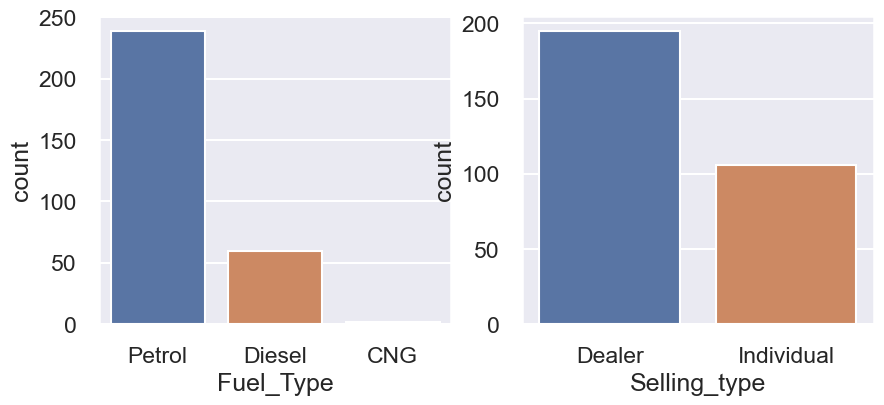

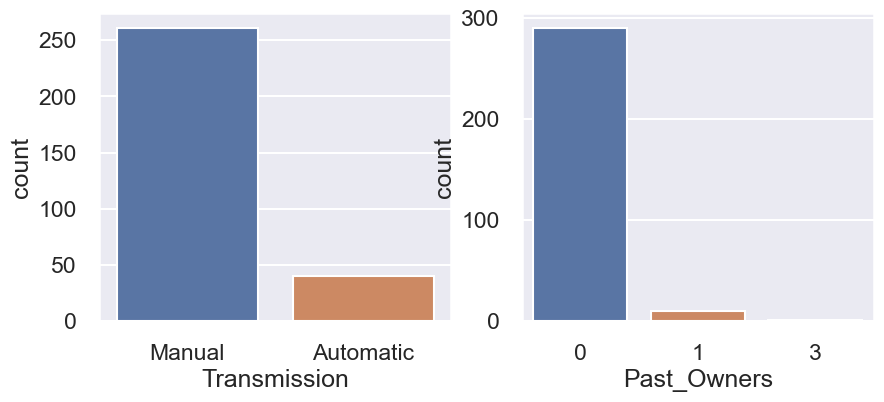

In [37]:
# Visualizaton of data

cat_cols = ['Fuel_Type','Selling_type','Transmission','Past_Owners']
sns.set_theme(style="darkgrid", context="talk")
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

## Outlier Check

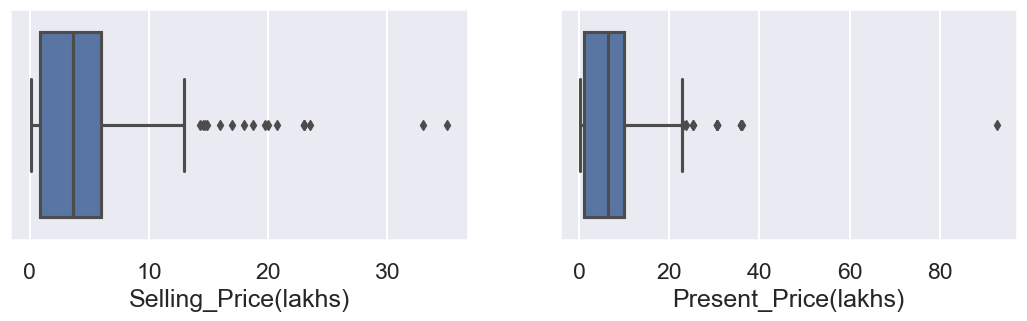

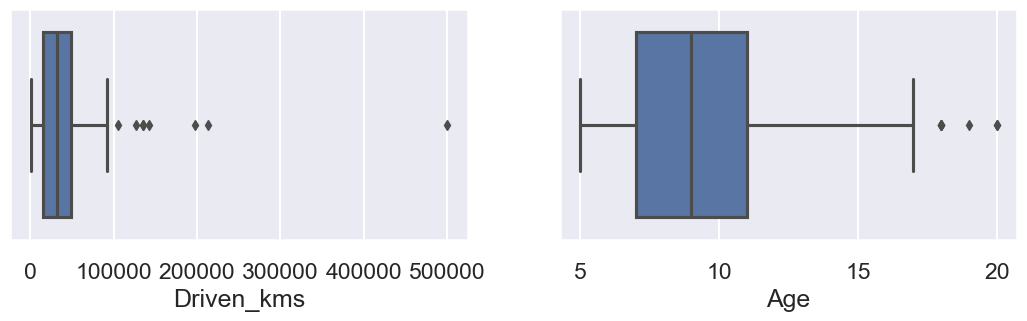

In [39]:
num_cols = ['Selling_Price(lakhs)','Present_Price(lakhs)','Driven_kms','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

In [40]:
df[df['Present_Price(lakhs)'] > df['Present_Price(lakhs)'].quantile(0.99)]

,Car_Name,Selling_Price(lakhs),Present_Price(lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,6
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,13


In [41]:
df[df['Selling_Price(lakhs)'] > df['Selling_Price(lakhs)'].quantile(0.99)]

,Car_Name,Selling_Price(lakhs),Present_Price(lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,8
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,6
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,13


In [42]:
df[df['Driven_kms'] > df['Driven_kms'].quantile(0.99)]

,Car_Name,Selling_Price(lakhs),Present_Price(lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,18
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,13
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,15


#### Multi-Variate Analysis

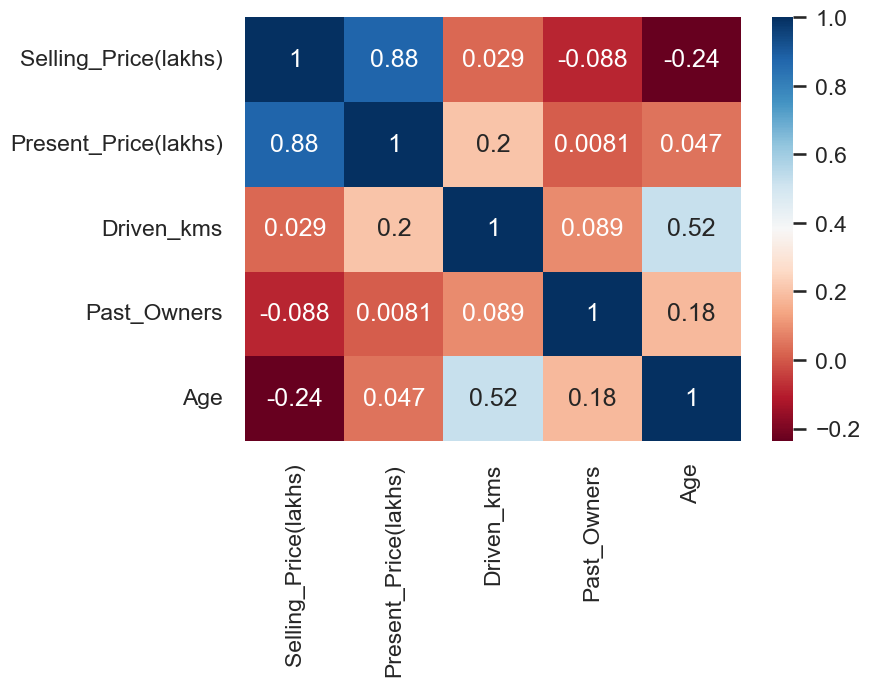

In [43]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [44]:
# Checking Correlation of selling price with other variables
df.corr()['Selling_Price(lakhs)']

Selling_Price(lakhs)    1.000000
Present_Price(lakhs)    0.878914
Driven_kms              0.029187
Past_Owners            -0.088344
Age                    -0.236141
Name: Selling_Price(lakhs), dtype: float64

In [45]:
df.pivot_table(values='Selling_Price(lakhs)', index = 'Selling_type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Selling_type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [46]:
df.pivot_table(values='Selling_Price(lakhs)', index = 'Selling_type', columns= 'Transmission')

Transmission,Automatic,Manual
Selling_type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


### Data Preparation

#### Creating Dummies for Categorical Features

In [47]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [48]:
df.head()

,Selling_Price(lakhs),Present_Price(lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [49]:
df = pd.get_dummies(data = df,drop_first=True) 

In [50]:
df.head()

,Selling_Price(lakhs),Present_Price(lakhs),Driven_kms,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


### Train-Test Split

In [51]:
# Separating target variable and its features
y = df['Selling_Price(lakhs)']
X = df.drop('Selling_Price(lakhs)',axis=1)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


### Model Creation/Evaluation

In [54]:
# Modules for model evaluation
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

R-squared (R²) and cross-validation (CV) scores are key metrics for model validation:

1. R-squared (R²): measures how well a regression model fits the data, with a range of 0 to 1. Higher values suggest a better fit.

2. Cross-validation (CV): assesses a model's performance by splitting the data into subsets and averaging the model's performance across these subsets. It gauges how well the model generalizes to new data and helps prevent overfitting. These scores collectively validate the model's goodness of fit and generalization ability.

In [55]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Standard Linear Regression

The `sklearn.linear_model.LinearRegression` model in scikit-learn is a fundamental tool for linear regression, ideal for modeling relationships between variables by fitting a best-fit linear equation. It's widely used for predictive modeling and understanding feature relationships, making it an essential tool for data analysis and machine learning tasks.


Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.8990761  0.89776701 0.82981561 0.81795625 0.76012544]
Train CV mean : 0.84


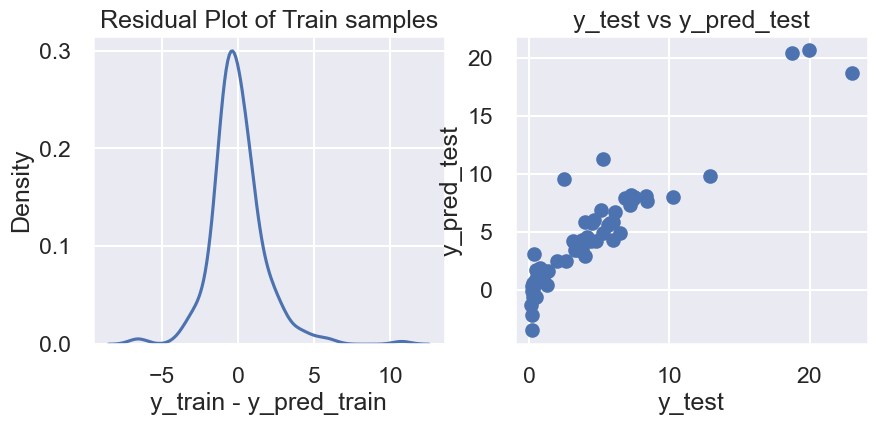

In [56]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

#### Ridge

`sklearn.linear_model.Ridge` in scikit-learn is a linear regression model with built-in regularization. It's a valuable tool for mitigating overfitting by penalizing large coefficients. Ridge regression is especially useful for handling multicollinearity, making it a smart choice for regression tasks with high-dimensional or noisy data, striking a balance between model fit and simplicity.

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89907549 0.89776791 0.82982208 0.81795705 0.73278673]
Train CV mean : 0.84


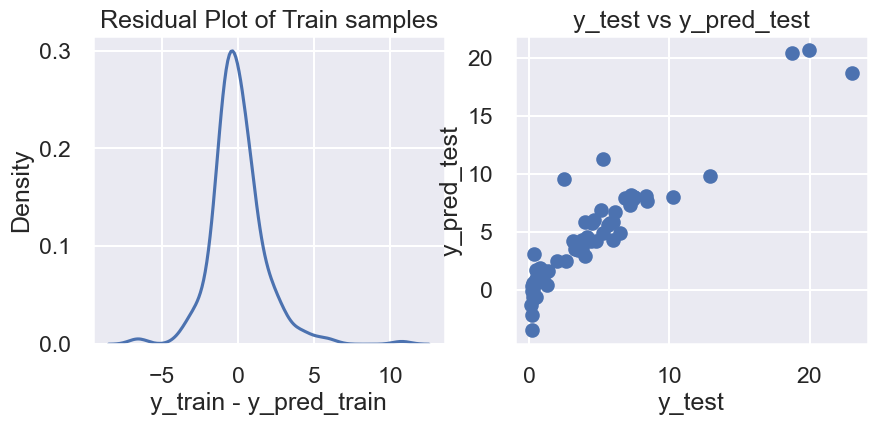

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

#### Lasso

The `sklearn.linear_model.Lasso` model, a part of the scikit-learn library, is a variant of linear regression that employs L1 regularization. It's valuable for feature selection and model simplification by forcing some feature coefficients to be exactly zero, effectively acting as an automatic feature selector. This property makes Lasso regression particularly useful for datasets with many features or when there's a need to identify the most important predictors. By penalizing less important features, Lasso helps create more interpretable and efficient models, making it a powerful choice for a variety of predictive modeling tasks.

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.88
Test R2-score : 0.87
Train CV scores : [0.89905191 0.89913326 0.83017798 0.81795538 0.70121811]
Train CV mean : 0.83


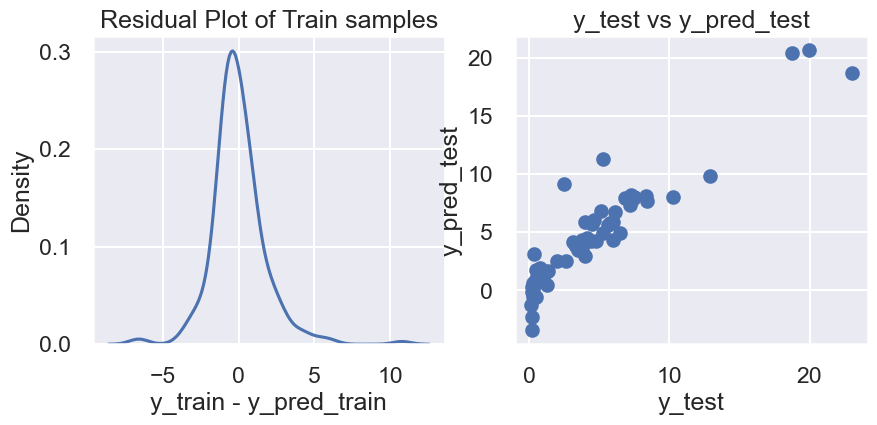

In [59]:
car_pred_model(ls_rs,"lasso.pkl")

#### Random Forest

The `sklearn.ensemble.RandomForestRegressor` in scikit-learn is a robust ensemble learning model for regression. By combining multiple decision trees, it excels at capturing complex data patterns, feature importance analysis, and preventing overfitting. This model is highly versatile, making it a preferred choice for a wide array of regression tasks, particularly those involving noisy or high-dimensional data, due to its strong predictive capabilities and resilience to outliers and noise.

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.97
Test R2-score : 0.84
Train CV scores : [0.87272871 0.95774831 0.85214833 0.92498573 0.74797889]
Train CV mean : 0.87


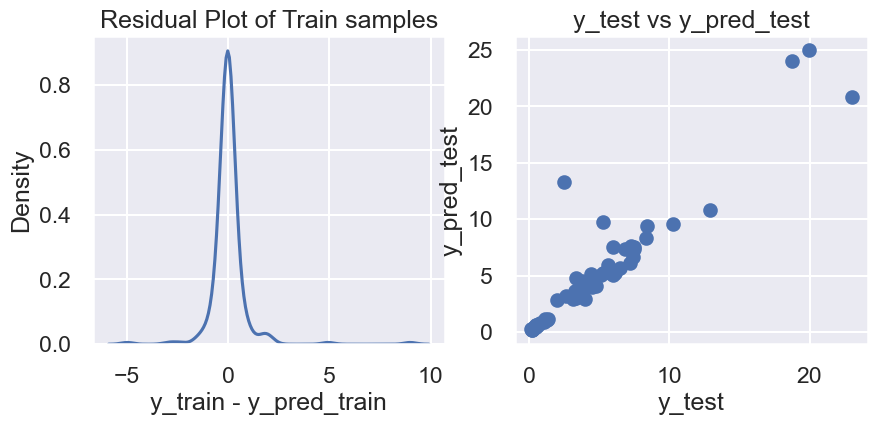

In [61]:
car_pred_model(rf_rs,'random_forest.pkl')

In [62]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=700)


#### Gradient Boosting

The `sklearn.ensemble.GradientBoostingRegressor` in scikit-learn is a potent ensemble learning model for regression. It iteratively enhances prediction accuracy by fitting decision trees to previous residuals. This model is highly regarded for its predictive capabilities, particularly in tasks requiring precise model optimization, making it a valuable choice across various domains, including finance and machine learning competitions.

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.74
Train CV scores : [0.92483501 0.92510686 0.89658949 0.94408649 0.66044274]
Train CV mean : 0.87


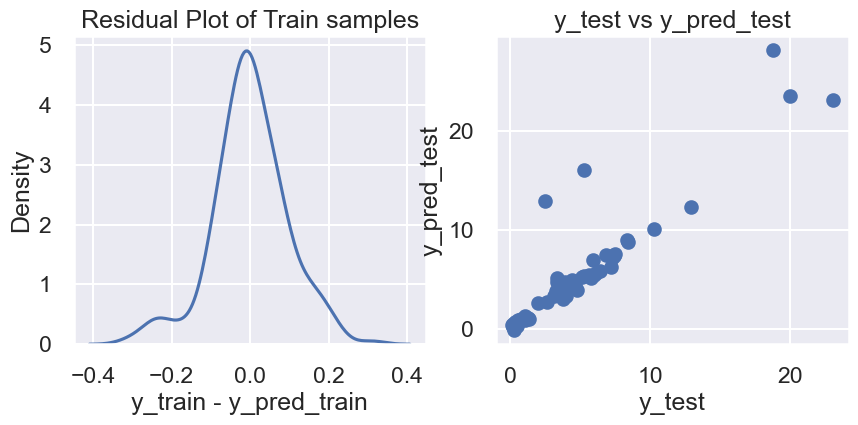

In [64]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

## Model Comparison

In [65]:
models = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': models,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.87,0.83
3,RandomForestRegressor,0.97,0.84,0.87
4,GradientBoostingRegressor,1.00,0.74,0.87
